## Funnel Analysis on Dataset

In [39]:
# Set-up

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
# Corporate Styling

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("Everything is fine")


Everything is fine


: 

In [ ]:
# Load Dataset

df = pd.read_csv("Funnel_analysis_data.csv")
df.head()

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag
0,USR00001,SES00001,Browse,2025-10-28 07:33:50,Desktop,West,Organic,Home,0.0,Yes
1,USR00001,SES00001,Add to Cart,2025-10-28 07:36:50,Tablet,East,Social Media,Beauty,0.0,Yes
2,USR00001,SES00001,Checkout,2025-10-28 07:40:50,Mobile,West,Email,Beauty,0.0,Yes
3,USR00002,SES00002,Browse,2025-10-19 09:15:10,Desktop,East,Email,Electronics,0.0,No
4,USR00002,SES00002,Add to Cart,2025-10-19 09:18:10,Mobile,West,Social Media,Fashion,0.0,No


: 

In [ ]:
# Exploring Data

: 

In [ ]:
df.tail()

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag
21658,USR09999,SES09999,Browse,2025-10-03 17:22:58,Desktop,South,Google Ads,Electronics,0.00,No
21659,USR09999,SES09999,Add to Cart,2025-10-03 17:26:58,Tablet,West,Social Media,Fashion,0.00,No
21660,USR09999,SES09999,Checkout,2025-10-03 17:29:58,Mobile,North,Email,Fashion,0.00,No
21661,USR09999,SES09999,Purchase,2025-10-03 17:34:58,Mobile,East,Email,Fashion,960.65,No
21662,USR10000,SES10000,Browse,2025-10-15 20:32:43,Mobile,South,Google Ads,Beauty,0.00,Yes


: 

In [ ]:
df.sample

<bound method NDFrame.sample of         User_ID Session_ID        Event            Timestamp   Device Region  \
0      USR00001   SES00001       Browse  2025-10-28 07:33:50  Desktop   West   
1      USR00001   SES00001  Add to Cart  2025-10-28 07:36:50   Tablet   East   
2      USR00001   SES00001     Checkout  2025-10-28 07:40:50   Mobile   West   
3      USR00002   SES00002       Browse  2025-10-19 09:15:10  Desktop   East   
4      USR00002   SES00002  Add to Cart  2025-10-19 09:18:10   Mobile   West   
...         ...        ...          ...                  ...      ...    ...   
21658  USR09999   SES09999       Browse  2025-10-03 17:22:58  Desktop  South   
21659  USR09999   SES09999  Add to Cart  2025-10-03 17:26:58   Tablet   West   
21660  USR09999   SES09999     Checkout  2025-10-03 17:29:58   Mobile  North   
21661  USR09999   SES09999     Purchase  2025-10-03 17:34:58   Mobile   East   
21662  USR10000   SES10000       Browse  2025-10-15 20:32:43   Mobile  South   

       

: 

In [ ]:
df.columns

Index(['User_ID', 'Session_ID', 'Event', 'Timestamp', 'Device', 'Region',
       'Channel', 'Product_Category', 'Revenue', 'Bounce_Flag'],
      dtype='str')

: 

In [ ]:
df.columns.nunique()

10

: 

In [ ]:
df.dtypes

User_ID                 str
Session_ID              str
Event                   str
Timestamp               str
Device                  str
Region                  str
Channel                 str
Product_Category        str
Revenue             float64
Bounce_Flag             str
dtype: object

: 

In [ ]:
# timestamp datatype conversion
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df.dtypes)

User_ID                        str
Session_ID                     str
Event                          str
Timestamp           datetime64[us]
Device                         str
Region                         str
Channel                        str
Product_Category               str
Revenue                    float64
Bounce_Flag                    str
dtype: object


: 

In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 21663 entries, 0 to 21662
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_ID           21663 non-null  str           
 1   Session_ID        21663 non-null  str           
 2   Event             21663 non-null  str           
 3   Timestamp         21663 non-null  datetime64[us]
 4   Device            21663 non-null  str           
 5   Region            21663 non-null  str           
 6   Channel           21663 non-null  str           
 7   Product_Category  21663 non-null  str           
 8   Revenue           21663 non-null  float64       
 9   Bounce_Flag       21663 non-null  str           
dtypes: datetime64[us](1), float64(1), str(8)
memory usage: 1.7 MB


: 

In [ ]:
df.describe()

,Timestamp,Revenue
count,21663,21663.000000
mean,2025-10-16 19:56:22.920740,54.304841
min,2025-10-01 19:30:17,0.000000
25%,2025-10-09 08:31:38,0.000000
50%,2025-10-16 19:47:21,0.000000
75%,2025-10-24 08:13:17,0.000000
max,2025-10-31 19:25:15,1998.510000
std,NaN,262.692471


: 

In [ ]:
df.describe(include='object')

C:\Users\nelis\AppData\Local\Temp\ipykernel_20696\87514550.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='object')


,User_ID,Session_ID,Event,Device,Region,Channel,Product_Category,Bounce_Flag
count,21663,21663,21663,21663,21663,21663,21663,21663
unique,10000,10000,4,3,4,4,5,2
top,USR00002,SES00002,Browse,Tablet,West,Google Ads,Electronics,Yes
freq,4,4,10000,7237,5462,5435,4405,17343


: 

In [ ]:
df.shape

(21663, 10)

: 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


: 

In [ ]:
df.head(10)

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag
0,USR00001,SES00001,Browse,2025-10-28 07:33:50,Desktop,West,Organic,Home,0.00,Yes
1,USR00001,SES00001,Add to Cart,2025-10-28 07:36:50,Tablet,East,Social Media,Beauty,0.00,Yes
2,USR00001,SES00001,Checkout,2025-10-28 07:40:50,Mobile,West,Email,Beauty,0.00,Yes
3,USR00002,SES00002,Browse,2025-10-19 09:15:10,Desktop,East,Email,Electronics,0.00,No
4,USR00002,SES00002,Add to Cart,2025-10-19 09:18:10,Mobile,West,Social Media,Fashion,0.00,No
5,USR00002,SES00002,Checkout,2025-10-19 09:23:10,Desktop,North,Social Media,Fashion,0.00,No
6,USR00002,SES00002,Purchase,2025-10-19 09:27:10,Mobile,North,Google Ads,Sports,448.18,No
7,USR00003,SES00003,Browse,2025-10-12 02:19:00,Desktop,East,Google Ads,Beauty,0.00,No
8,USR00003,SES00003,Add to Cart,2025-10-12 02:22:00,Tablet,South,Social Media,Beauty,0.00,No
9,USR00003,SES00003,Checkout,2025-10-12 02:26:00,Desktop,West,Google Ads,Sports,0.00,No


: 

## Data Processing and Cleaning

In [ ]:
#checking fpor null and duplicate values
df.isnull().sum()


User_ID             0
Session_ID          0
Event               0
Timestamp           0
Device              0
Region              0
Channel             0
Product_Category    0
Revenue             0
Bounce_Flag         0
dtype: int64

: 

In [ ]:
df.duplicated().sum()

np.int64(0)

: 

In [ ]:
df.nunique()

User_ID             10000
Session_ID          10000
Event                   4
Timestamp           21564
Device                  3
Region                  4
Channel                 4
Product_Category        5
Revenue              1078
Bounce_Flag             2
dtype: int64

: 

In [ ]:
# Extracting date and time features
df['Date'] = df['Timestamp'].dt.date    
df['DayOfWeek'] = df['Timestamp'].dt.day_name()    
df['Hour'] = df['Timestamp'].dt.hour
df['WeekNumber'] = df['Timestamp'].dt.isocalendar().week  


: 

In [ ]:
df.head(3)

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag,Date,DayOfWeek,Hour,WeekNumber
0,USR00001,SES00001,Browse,2025-10-28 07:33:50,Desktop,West,Organic,Home,0.0,Yes,2025-10-28,Tuesday,7,44
1,USR00001,SES00001,Add to Cart,2025-10-28 07:36:50,Tablet,East,Social Media,Beauty,0.0,Yes,2025-10-28,Tuesday,7,44
2,USR00001,SES00001,Checkout,2025-10-28 07:40:50,Mobile,West,Email,Beauty,0.0,Yes,2025-10-28,Tuesday,7,44


: 

In [ ]:
df['Event_sequence'] = df.groupby('User_ID')['Event'].cumcount() + 1

: 

In [ ]:
df.head(3)

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag,Date,DayOfWeek,Hour,WeekNumber,Event_sequence
0,USR00001,SES00001,Browse,2025-10-28 07:33:50,Desktop,West,Organic,Home,0.0,Yes,2025-10-28,Tuesday,7,44,1
1,USR00001,SES00001,Add to Cart,2025-10-28 07:36:50,Tablet,East,Social Media,Beauty,0.0,Yes,2025-10-28,Tuesday,7,44,2
2,USR00001,SES00001,Checkout,2025-10-28 07:40:50,Mobile,West,Email,Beauty,0.0,Yes,2025-10-28,Tuesday,7,44,3


: 

In [ ]:
df['User_ID'].nunique()

10000

: 

In [ ]:
df['Session_ID'].nunique()

10000

: 

In [ ]:
df['Date'].min(), df['Date'].max()

(datetime.date(2025, 10, 1), datetime.date(2025, 10, 31))

: 

In [ ]:
df.head(20)

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag,Date,DayOfWeek,Hour,WeekNumber,Event_sequence
0,USR00001,SES00001,Browse,2025-10-28 07:33:50,Desktop,West,Organic,Home,0.00,Yes,2025-10-28,Tuesday,7,44,1
1,USR00001,SES00001,Add to Cart,2025-10-28 07:36:50,Tablet,East,Social Media,Beauty,0.00,Yes,2025-10-28,Tuesday,7,44,2
2,USR00001,SES00001,Checkout,2025-10-28 07:40:50,Mobile,West,Email,Beauty,0.00,Yes,2025-10-28,Tuesday,7,44,3
3,USR00002,SES00002,Browse,2025-10-19 09:15:10,Desktop,East,Email,Electronics,0.00,No,2025-10-19,Sunday,9,42,1
4,USR00002,SES00002,Add to Cart,2025-10-19 09:18:10,Mobile,West,Social Media,Fashion,0.00,No,2025-10-19,Sunday,9,42,2
5,USR00002,SES00002,Checkout,2025-10-19 09:23:10,Desktop,North,Social Media,Fashion,0.00,No,2025-10-19,Sunday,9,42,3
6,USR00002,SES00002,Purchase,2025-10-19 09:27:10,Mobile,North,Google Ads,Sports,448.18,No,2025-10-19,Sunday,9,42,4
7,USR00003,SES00003,Browse,2025-10-12 02:19:00,Desktop,East,Google Ads,Beauty,0.00,No,2025-10-12,Sunday,2,41,1
8,USR00003,SES00003,Add to Cart,2025-10-12 02:22:00,Tablet,South,Social Media,Beauty,0.00,No,2025-10-12,Sunday,2,41,2
9,USR00003,SES00003,Checkout,2025-10-12 02:26:00,Desktop,West,Google Ads,Sports,0.00,No,2025-10-12,Sunday,2,41,3


: 

## Funnel Stage Definition and Session-Level Aggregation

In [ ]:
#Define funnel stages in order
funnel_stages = ['Browse', 'Add to Cart', 'Checkout', 'Purchase']
df = df.sort_values(['Session_ID', 'Timestamp'])


# Create the session-level summary
session_summary = df.groupby('Session_ID').agg({
    'User_ID': 'first',
    'Timestamp': ['min', 'max'],
    'Event': lambda x: list(x),
    'Device': 'first',
    'Region': 'first',
    'Channel': 'first',
    'Product_Category': 'first',
    'Revenue': 'max',
    'Bounce_Flag': 'first'
}).reset_index()


# Flatten MultiIndex columns
session_summary.columns = [
    'Session_ID', 'User_ID', 'Session_Start', 'Session_End',
    'Event_Sequence', 'Device', 'Region', 'Channel',
    'Product_Category', 'Revenue', 'Bounce_Flag'
]

#Calculate the session duration
session_summary['Session_Duration_Min'] = (
    session_summary['Session_End'] - session_summary['Session_Start']
).dt.total_seconds() / 60

# Identify maximum funnel stage reached for each session
def get_max_funnel_stage(events):
    stage_values = {stage: i for i, stage in enumerate(funnel_stages)}
    max_stage_index = -1
    for event in events:
        if event in stage_values and stage_values[event] > max_stage_index:
            max_stage_index = stage_values[event]
    return funnel_stages[max_stage_index] if max_stage_index != -1 else 'Browse'
session_summary['Max_Funnel_Stage'] = session_summary['Event_Sequence'].apply(get_max_funnel_stage)

session_summary.head(10)

,Session_ID,User_ID,Session_Start,Session_End,Event_Sequence,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag,Session_Duration_Min,Max_Funnel_Stage
0,SES00001,USR00001,2025-10-28 07:33:50,2025-10-28 07:40:50,"[Browse, Add to Cart, Checkout]",Desktop,West,Organic,Home,0.00,Yes,7.0,Checkout
1,SES00002,USR00002,2025-10-19 09:15:10,2025-10-19 09:27:10,"[Browse, Add to Cart, Checkout, Purchase]",Desktop,East,Email,Electronics,448.18,No,12.0,Purchase
2,SES00003,USR00003,2025-10-12 02:19:00,2025-10-12 02:29:00,"[Browse, Add to Cart, Checkout, Purchase]",Desktop,East,Google Ads,Beauty,1437.19,No,10.0,Purchase
3,SES00004,USR00004,2025-10-05 17:55:48,2025-10-05 17:55:48,[Browse],Tablet,West,Social Media,Home,0.00,Yes,0.0,Browse
4,SES00005,USR00005,2025-10-19 12:35:49,2025-10-19 12:37:49,"[Browse, Add to Cart]",Tablet,West,Google Ads,Electronics,0.00,Yes,2.0,Add to Cart
5,SES00006,USR00006,2025-10-06 13:20:53,2025-10-06 13:20:53,[Browse],Tablet,North,Email,Beauty,0.00,Yes,0.0,Browse
6,SES00007,USR00007,2025-10-20 15:23:11,2025-10-20 15:23:11,[Browse],Mobile,South,Google Ads,Home,0.00,Yes,0.0,Browse
7,SES00008,USR00008,2025-10-13 12:59:29,2025-10-13 13:10:29,"[Browse, Add to Cart, Checkout, Purchase]",Desktop,West,Google Ads,Beauty,304.30,No,11.0,Purchase
8,SES00009,USR00009,2025-10-17 10:27:10,2025-10-17 10:30:10,"[Browse, Add to Cart]",Tablet,South,Organic,Fashion,0.00,Yes,3.0,Add to Cart
9,SES00010,USR00010,2025-10-30 17:23:31,2025-10-30 17:23:31,[Browse],Desktop,West,Email,Sports,0.00,Yes,0.0,Browse


: 

## Overall Funnel and Revenue Analysis

In [ ]:
# -----------------------------
# OVERALL FUNNEL ANALYSIS
# -----------------------------

funnel_metrics = []

for i, stage in enumerate(funnel_stages):
    
    if i == 0:
        # Browse stage → all sessions start here
        count = len(session_summary)
    else:
        # Count sessions that reached at least this stage
        count = len(
            session_summary[
                session_summary['Max_Funnel_Stage'].isin(funnel_stages[i:])
            ]
        )

    funnel_metrics.append({
        'Stage': stage,
        'Sessions': count,
        'Stage_Order': i
    })

# Convert to DataFrame
funnel_df = pd.DataFrame(funnel_metrics)

# -----------------------------
# CONVERSION & DROP-OFF RATES
# -----------------------------

# Conversion rate from initial stage
funnel_df['Conversion_Rate'] = (
    funnel_df['Sessions'] / funnel_df['Sessions'].iloc[0] * 100
).round(2)

# Drop-off rate from previous stage
funnel_df['Drop_Off_Rate'] = (
    1 - funnel_df['Sessions'] / funnel_df['Sessions'].shift(1)
) * 100

# First stage has no drop-off
funnel_df.loc[0, 'Drop_Off_Rate'] = 0

funnel_df['Drop_Off_Rate'] = funnel_df['Drop_Off_Rate'].round(2)

print("Overall Funnel Analysis:")
display(funnel_df)


# -----------------------------
# REVENUE ANALYSIS (PURCHASES)
# -----------------------------

revenue_stats = session_summary[
    session_summary['Max_Funnel_Stage'] == 'Purchase'
].agg({
    'Revenue': ['sum', 'mean', 'count']
}).round(2)

print("\nRevenue Analysis:")
print(f"Total Revenue: ${revenue_stats.iloc[0,0]:,.2f}")
print(f"Average Order Value: ${revenue_stats.iloc[1,0]:,.2f}")
print(f"Total Orders: {int(revenue_stats.iloc[2,0])}")


Overall Funnel Analysis:


,Stage,Sessions,Stage_Order,Conversion_Rate,Drop_Off_Rate
0,Browse,10000,0,100.00,0.00
1,Add to Cart,7059,1,70.59,29.41
2,Checkout,3524,2,35.24,50.08
3,Purchase,1080,3,10.80,69.35



Revenue Analysis:
Total Revenue: $1,176,405.78
Average Order Value: $1,089.26
Total Orders: 1080


: 

### Visulaization - OverAll Funnel

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Funnel Conversion (Sessions)',
        'Stage-to-Stage Drop-off (%)',
        'Revenue by Funnel Stage',
        'Average Session Duration by Stage'
    )
)

#Funnel Conversion (SESSIONS)
fig.add_trace(
    go.Bar(
        x=funnel_df['Stage'],
        y=funnel_df['Sessions'],
        text=funnel_df['Sessions'],
        textposition='auto',
        name='Sessions',
        marker_color='lightblue'
    ),
    row=1, col=1
)

# DROP-OFF RATE
fig.add_trace(
    go.Scatter(
        x=funnel_df['Stage'],
        y=funnel_df['Drop_Off_Rate'],
        mode='lines+markers+text',
        text=funnel_df['Drop_Off_Rate'],
        textposition='top center',
        name='Drop-off Rate (%)',
        line=dict(color='red', width=3)
    ),
    row=1, col=2
)


# REVENUE BY FUNNEL STAGE
revenue_by_stage = (
    session_summary
    .groupby('Max_Funnel_Stage')['Revenue']
    .sum()
    .reset_index()
)

fig.add_trace(
    go.Bar(
        x=revenue_by_stage['Max_Funnel_Stage'],
        y=revenue_by_stage['Revenue'],
        text=[f"${x:,.0f}" for x in revenue_by_stage['Revenue']],
        textposition='auto',
        name='Revenue',
        marker_color='green'
    ),
    row=2, col=1
)

#Session Duration by Stage
duration_by_stage = (
    session_summary
    .groupby('Max_Funnel_Stage')['Session_Duration_Min']
    .mean()
    .reset_index()
)

fig.add_trace(
    go.Bar(
        x=duration_by_stage['Max_Funnel_Stage'],
        y=duration_by_stage['Session_Duration_Min'],
        text=duration_by_stage['Session_Duration_Min'].round(2),
        textposition='auto',
        name='Avg Session Duration (min)',
        marker_color='orange'
    ),
    row=2, col=2
)



fig.update_layout(
    height=800,
    title_text='Comprehensive Funnel Analysis Dashboard',
    showlegend=False
)

fig.show()


📊 Channel Performance Analysis:


,Channel,Total_Sessions,Browse_Sessions,Browse_Rate,Add to Cart_Sessions,Add to Cart_Rate,Checkout_Sessions,Checkout_Rate,Purchase_Sessions,Purchase_Rate,Total_Revenue,AOV,Conversion_Rate
0,Organic,2511,2511,100.0,1802,71.76,900,35.84,281,11.19,307448.35,1094.12,11.19
1,Social Media,2440,2440,100.0,1734,71.07,861,35.29,263,10.78,280071.63,1064.91,10.78
2,Email,2489,2489,100.0,1740,69.91,877,35.24,254,10.20,276116.54,1087.07,10.20
3,Google Ads,2560,2560,100.0,1783,69.65,886,34.61,282,11.02,312769.26,1109.11,11.02


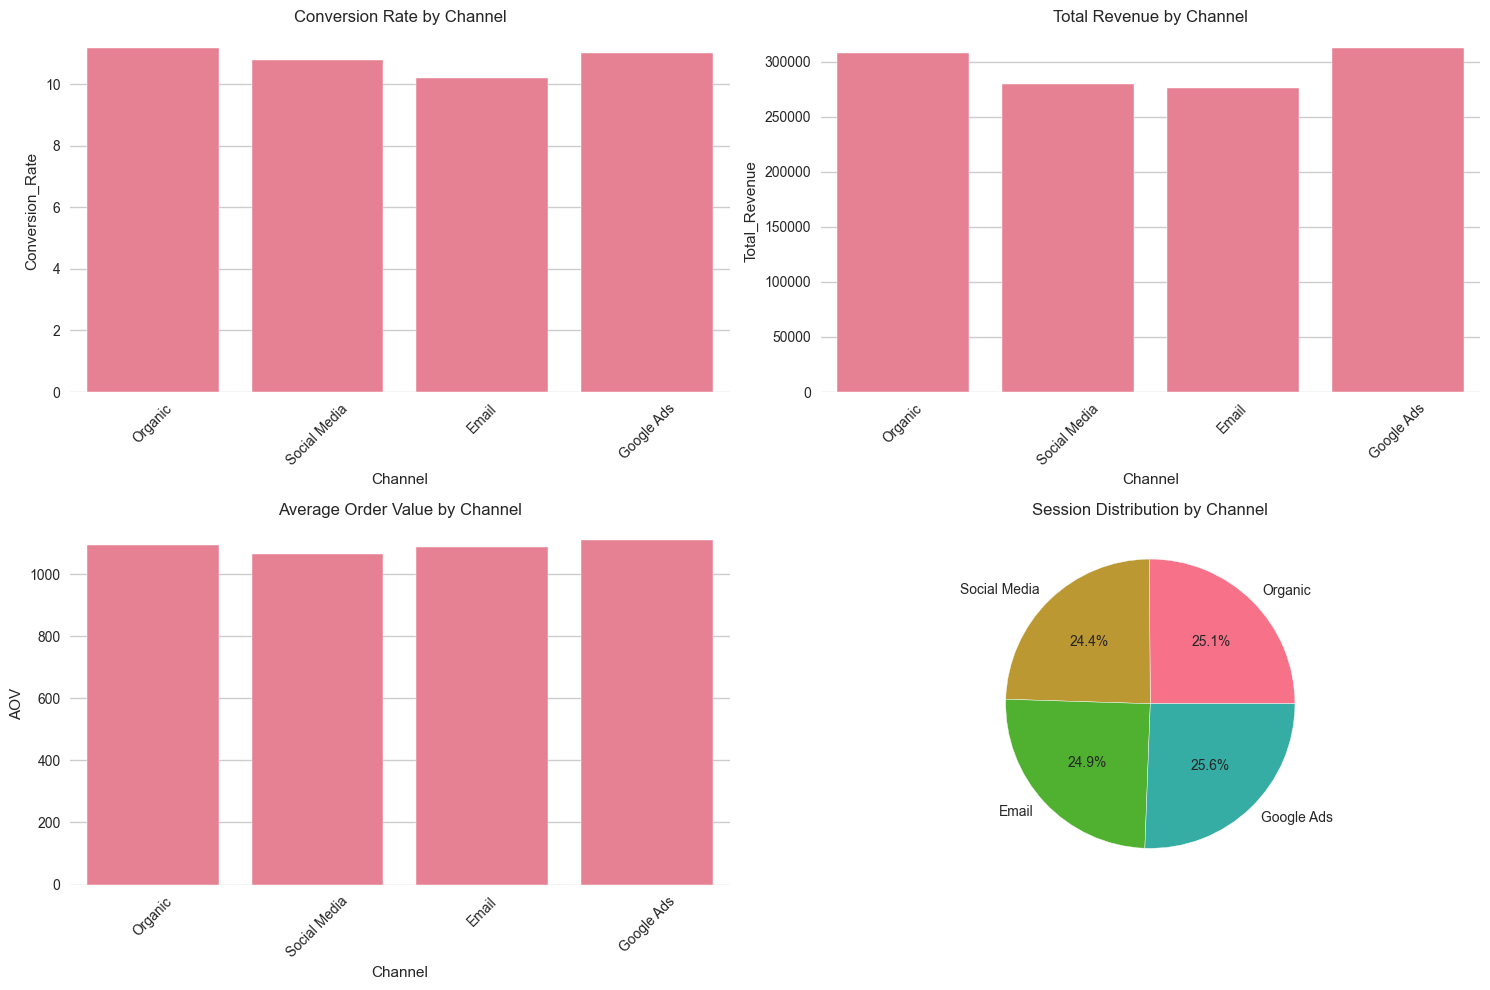

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# CHANNEL PERFORMANCE FUNNEL
# -----------------------------
channel_funnel = []

for channel in df['Channel'].unique():

    # Filter sessions belonging to this channel
    channel_sessions = session_summary[session_summary['Channel'] == channel]
    total_sessions = len(channel_sessions)

    if total_sessions == 0:
        continue

    channel_metrics = {
        'Channel': channel,
        'Total_Sessions': total_sessions
    }

    # Funnel stage metrics
    for i, stage in enumerate(funnel_stages):
        if i == 0:
            count = total_sessions
        else:
            count = len(
                channel_sessions[
                    channel_sessions['Max_Funnel_Stage'].isin(funnel_stages[i:])
                ]
            )

        channel_metrics[f'{stage}_Sessions'] = count
        channel_metrics[f'{stage}_Rate'] = (count / total_sessions) * 100

    # Revenue metrics (only purchase sessions)
    purchase_sessions = channel_sessions[channel_sessions['Max_Funnel_Stage'] == 'Purchase']

    channel_metrics['Total_Revenue'] = purchase_sessions['Revenue'].sum()
    channel_metrics['AOV'] = purchase_sessions['Revenue'].mean() if len(purchase_sessions) > 0 else 0
    channel_metrics['Conversion_Rate'] = (len(purchase_sessions) / total_sessions) * 100

    channel_funnel.append(channel_metrics)

# Create final dataframe
channel_df = pd.DataFrame(channel_funnel).round(2)

print("📊 Channel Performance Analysis:")
display(channel_df)

# -----------------------------
# VISUALIZATION
# -----------------------------
sns.set_style("whitegrid")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Conversion Rate by Channel
sns.barplot(data=channel_df, x='Channel', y='Conversion_Rate', ax=ax1)
ax1.set_title('Conversion Rate by Channel')
ax1.tick_params(axis='x', rotation=45)

# Total Revenue by Channel
sns.barplot(data=channel_df, x='Channel', y='Total_Revenue', ax=ax2)
ax2.set_title('Total Revenue by Channel')
ax2.tick_params(axis='x', rotation=45)

# Average Order Value by Channel
sns.barplot(data=channel_df, x='Channel', y='AOV', ax=ax3)
ax3.set_title('Average Order Value by Channel')
ax3.tick_params(axis='x', rotation=45)

# Session Distribution by Channel
channel_df['Session_Percentage'] = (
    channel_df['Total_Sessions'] / channel_df['Total_Sessions'].sum() * 100
)

ax4.pie(
    channel_df['Session_Percentage'],
    labels=channel_df['Channel'],
    autopct='%1.1f%%'
)
ax4.set_title('Session Distribution by Channel')

plt.tight_layout()
plt.show()


### Regional Analysis

🌍 Regional Performance:


,Total_Sessions,Total_Revenue,Session_Duration_Min,Converted_Sessions,Conversion_Rate,AOV
Region,,,,,,
East,2514,301767.14,4.146778,280,11.14,1077.74
North,2504,288027.95,3.998003,261,10.42,1103.56
South,2506,311018.57,4.102155,282,11.25,1102.90
West,2476,275592.12,4.080775,257,10.38,1072.34


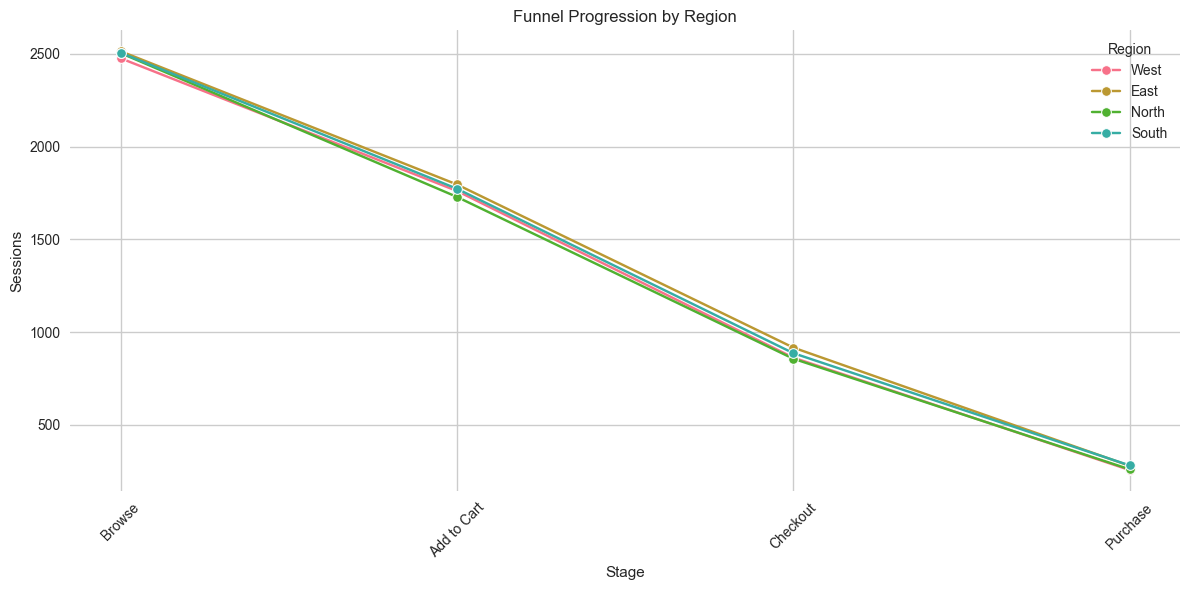

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# REGIONAL PERFORMANCE ANALYSIS
# -----------------------------
regional_analysis = (
    session_summary
    .groupby('Region')
    .agg({
        'Session_ID': 'count',
        'Revenue': 'sum',
        'Session_Duration_Min': 'mean'
    })
    .rename(columns={
        'Session_ID': 'Total_Sessions',
        'Revenue': 'Total_Revenue'
    })
)

# Count how many sessions converted (Purchase) per region
regional_conversion = (
    session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase']
    .groupby('Region')
    .size()
)

# Add Converted Sessions (fill missing regions with 0)
regional_analysis['Converted_Sessions'] = regional_conversion
regional_analysis['Converted_Sessions'] = regional_analysis['Converted_Sessions'].fillna(0).astype(int)

# Conversion rate + AOV (avoid divide by zero)
regional_analysis['Conversion_Rate'] = (
    regional_analysis['Converted_Sessions'] / regional_analysis['Total_Sessions'] * 100
).round(2)

regional_analysis['AOV'] = (
    regional_analysis['Total_Revenue'] / regional_analysis['Converted_Sessions'].replace(0, pd.NA)
).round(2)

print("🌍 Regional Performance:")
display(regional_analysis)

# ----------------------------------------
# REGIONAL FUNNEL VISUALIZATION (LINEPLOT)
# ----------------------------------------
regional_funnel_data = []

for region in df['Region'].unique():
    region_sessions = session_summary[session_summary['Region'] == region]

    for stage in funnel_stages:
        if stage == 'Browse':
            count = len(region_sessions)
        else:
            # count sessions that reached at least this stage
            count = len(
                region_sessions[
                    region_sessions['Max_Funnel_Stage'].isin(
                        funnel_stages[funnel_stages.index(stage):]
                    )
                ]
            )

        regional_funnel_data.append({
            'Region': region,
            'Stage': stage,
            'Sessions': count
        })

regional_funnel_df = pd.DataFrame(regional_funnel_data)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=regional_funnel_df,
    x='Stage',
    y='Sessions',
    hue='Region',
    marker='o'
)
plt.title('Funnel Progression by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Device and Category Analysis

📱 Device Performance:


,Total_Sessions,Revenue,Session_Duration_Min,Purchases,Conversion_Rate,AOV
Device,,,,,,
Desktop,3331,399395.43,4.095167,372,11.17,1073.64
Mobile,3345,405451.84,4.061584,363,10.85,1116.95
Tablet,3324,371558.51,4.089350,345,10.38,1076.98


📦 Product Category Performance:


,Total_Sessions,Revenue,Purchases,Conversion_Rate,AOV,Revenue_Per_Session
Product_Category,,,,,,
Beauty,1978,241834.97,226,11.43,1070.07,122.26
Electronics,2046,226451.63,208,10.17,1088.71,110.68
Fashion,2035,237261.50,220,10.81,1078.46,116.59
Home,1941,232534.83,211,10.87,1102.06,119.80
Sports,2000,238322.85,215,10.75,1108.48,119.16


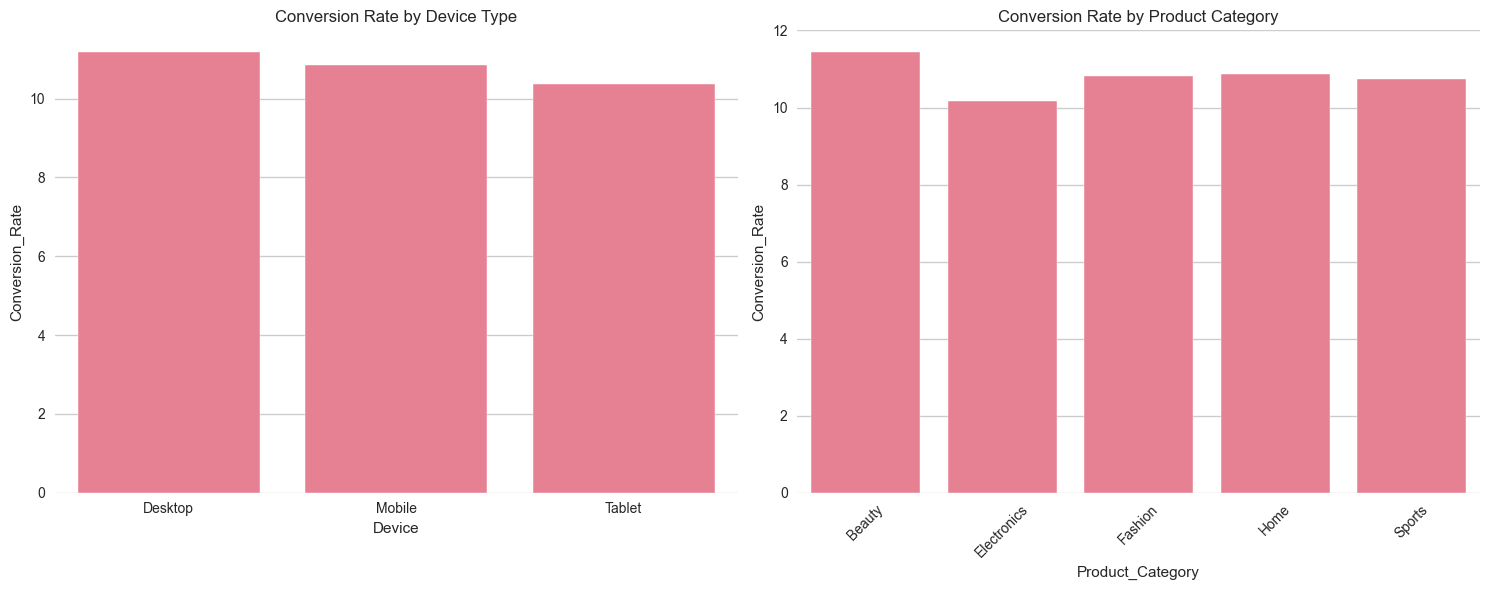

In [43]:
# =========================
# DEVICE PERFORMANCE ANALYSIS
# =========================

# Aggregate metrics by device
device_analysis = session_summary.groupby('Device').agg({
    'Session_ID': 'count',
    'Revenue': 'sum',
    'Session_Duration_Min': 'mean',
    'Max_Funnel_Stage': lambda x: (x == 'Purchase').sum()
}).rename(columns={
    'Session_ID': 'Total_Sessions',
    'Max_Funnel_Stage': 'Purchases'
})

# Conversion rate & AOV
device_analysis['Conversion_Rate'] = (
    device_analysis['Purchases'] / device_analysis['Total_Sessions'] * 100
).round(2)

device_analysis['AOV'] = (
    device_analysis['Revenue'] / device_analysis['Purchases']
).round(2)

print("📱 Device Performance:")
display(device_analysis)


# =========================
# PRODUCT CATEGORY ANALYSIS
# =========================

product_analysis = session_summary.groupby('Product_Category').agg({
    'Session_ID': 'count',
    'Revenue': 'sum',
    'Max_Funnel_Stage': lambda x: (x == 'Purchase').sum()
}).rename(columns={
    'Session_ID': 'Total_Sessions',
    'Max_Funnel_Stage': 'Purchases'
})

# Conversion rate, AOV, Revenue per Session
product_analysis['Conversion_Rate'] = (
    product_analysis['Purchases'] / product_analysis['Total_Sessions'] * 100
).round(2)

product_analysis['AOV'] = (
    product_analysis['Revenue'] / product_analysis['Purchases']
).round(2)

product_analysis['Revenue_Per_Session'] = (
    product_analysis['Revenue'] / product_analysis['Total_Sessions']
).round(2)

print("📦 Product Category Performance:")
display(product_analysis)


# =========================
# COMBINED VISUALIZATION
# =========================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Device conversion rate
sns.barplot(
    data=device_analysis.reset_index(),
    x='Device',
    y='Conversion_Rate',
    ax=ax1
)
ax1.set_title('Conversion Rate by Device Type')

# Product category conversion rate
sns.barplot(
    data=product_analysis.reset_index(),
    x='Product_Category',
    y='Conversion_Rate',
    ax=ax2
)
ax2.set_title('Conversion Rate by Product Category')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Full Time-Based Analysis


### 1. Daily Trends (Sessions, Users, Revenue)

In [44]:
# -----------------------------
# Daily trends
# -----------------------------
daily_metrics = df.groupby('Date').agg({
    'Session_ID': 'nunique',
    'User_ID': 'nunique',
    'Revenue': 'sum'
}).rename(columns={
    'Session_ID': 'Daily_Sessions',
    'User_ID': 'Daily_Users'
})

# -----------------------------
# Daily conversions
# -----------------------------
daily_conversions = (
    session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase']
    .groupby(session_summary['Session_Start'].dt.date)
    .size()
)

daily_metrics['Daily_Conversions'] = daily_conversions
daily_metrics['Daily_Conversions'] = daily_metrics['Daily_Conversions'].fillna(0)

daily_metrics['Daily_Conversion_Rate'] = (
    daily_metrics['Daily_Conversions'] / daily_metrics['Daily_Sessions'] * 100
).round(2)

print("📅 Daily Performance Trends:")
display(daily_metrics.tail(10))


📅 Daily Performance Trends:


,Daily_Sessions,Daily_Users,Revenue,Daily_Conversions,Daily_Conversion_Rate
Date,,,,,
2025-10-22,300,300,33633.64,31,10.33
2025-10-23,347,347,50983.83,47,13.54
2025-10-24,315,315,39543.10,38,12.06
2025-10-25,364,364,50965.19,42,11.54
2025-10-26,355,355,42548.29,38,10.70
2025-10-27,310,310,41315.66,42,13.55
2025-10-28,347,347,39963.77,31,8.93
2025-10-29,336,336,29960.83,28,8.33
2025-10-30,331,331,35412.95,34,10.27


### 2. Hourly Patterns (Sessions + Revenue)

In [45]:
# -----------------------------
# Hourly session metrics
# -----------------------------
hourly_sessions = df.groupby('Hour').agg({
    'Session_ID': 'nunique',
    'Revenue': 'sum'
}).rename(columns={
    'Session_ID': 'Hourly_Sessions'
})

# -----------------------------
# Hourly conversions
# -----------------------------
hourly_conversions = session_summary[
    session_summary['Max_Funnel_Stage'] == 'Purchase'
].copy()

hourly_conversions['Hour'] = hourly_conversions['Session_Start'].dt.hour

hourly_conversion_counts = hourly_conversions.groupby('Hour').size()

hourly_sessions['Hourly_Conversions'] = hourly_conversion_counts
hourly_sessions['Hourly_Conversions'] = hourly_sessions['Hourly_Conversions'].fillna(0)

hourly_sessions['Hourly_Conversion_Rate'] = (
    hourly_sessions['Hourly_Conversions'] / hourly_sessions['Hourly_Sessions'] * 100
).round(2)


### 3. Visualization (4-Panel Dashboard)

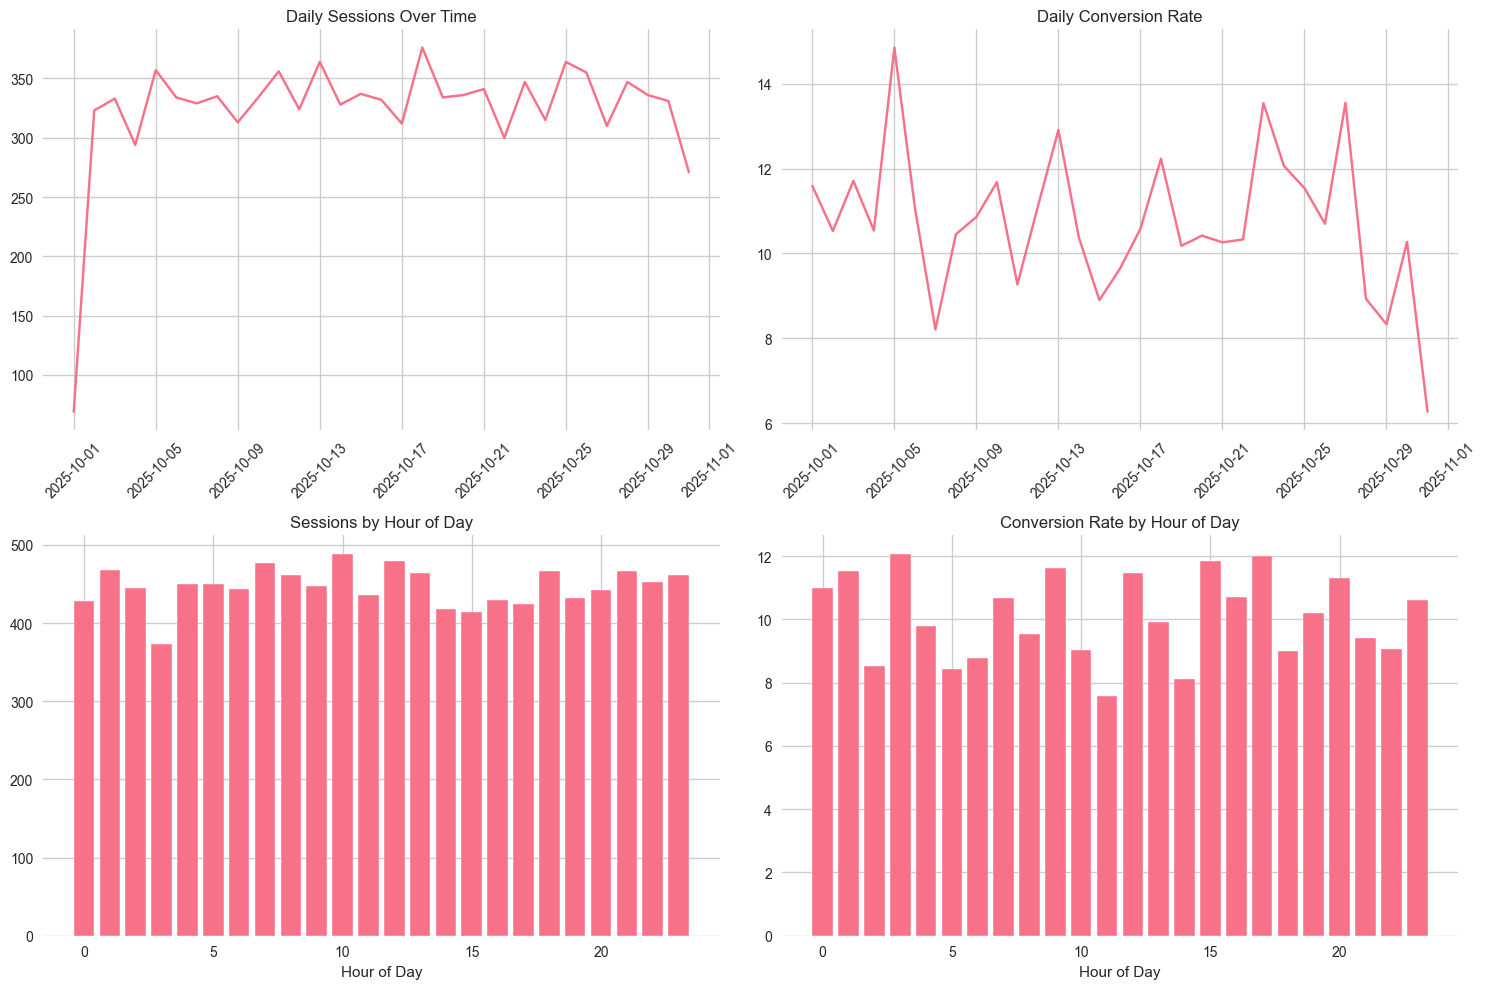

In [47]:
# -----------------------------
# Visualization
# -----------------------------
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Daily sessions
ax1.plot(daily_metrics.index, daily_metrics['Daily_Sessions'])
ax1.set_title('Daily Sessions Over Time')
ax1.tick_params(axis='x', rotation=45)

# Daily conversion rate
ax2.plot(daily_metrics.index, daily_metrics['Daily_Conversion_Rate'])
ax2.set_title('Daily Conversion Rate')
ax2.tick_params(axis='x', rotation=45)

# Hourly sessions
ax3.bar(hourly_sessions.index, hourly_sessions['Hourly_Sessions'])
ax3.set_title('Sessions by Hour of Day')
ax3.set_xlabel('Hour of Day')

# Hourly conversion rate
ax4.bar(hourly_sessions.index, hourly_sessions['Hourly_Conversion_Rate'])
ax4.set_title('Conversion Rate by Hour of Day')
ax4.set_xlabel('Hour of Day')

plt.tight_layout()
plt.show()


### Advanced Funnel Metrics & KPIs

In [49]:
# ================================
# Advanced Funnel Metrics and KPIs
# ================================

print(" KEY PERFORMANCE INDICATORS (KPIs)")
print("=" * 50)

# ----------------
# Overall KPIs
# ----------------
total_sessions = len(session_summary)
total_revenue = session_summary['Revenue'].sum()
total_orders = len(session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase'])
overall_conversion_rate = (total_orders / total_sessions) * 100

print(f" Overall Conversion Rate: {overall_conversion_rate:.2f}%")
print(f" Total Revenue: ${total_revenue:,.2f}")
print(f" Average Order Value: ${(total_revenue / total_orders):.2f}")
print(f" Total Sessions: {total_sessions:,}")
print(f" Total Orders: {total_orders:,}")

# ----------------
# Funnel efficiency (stage-to-stage conversion)
# ----------------
browse_to_cart = (funnel_df.iloc[1]['Sessions'] / funnel_df.iloc[0]['Sessions']) * 100
cart_to_checkout = (funnel_df.iloc[2]['Sessions'] / funnel_df.iloc[1]['Sessions']) * 100
checkout_to_purchase = (funnel_df.iloc[3]['Sessions'] / funnel_df.iloc[2]['Sessions']) * 100

print("\n Stage-to-Stage Conversion Rates:")
print(f"   Browse → Add to Cart: {browse_to_cart:.2f}%")
print(f"   Add to Cart → Checkout: {cart_to_checkout:.2f}%")
print(f"   Checkout → Purchase: {checkout_to_purchase:.2f}%")

# ----------------
# Revenue per session at each stage
# ----------------
revenue_per_browse = total_revenue / funnel_df.iloc[0]['Sessions']
revenue_per_cart = total_revenue / funnel_df.iloc[1]['Sessions']
revenue_per_checkout = total_revenue / funnel_df.iloc[2]['Sessions']

print("\n Revenue per Session by Stage:")
print(f"   Per Browse Session: ${revenue_per_browse:.2f}")
print(f"   Per Cart Session: ${revenue_per_cart:.2f}")
print(f"   Per Checkout Session: ${revenue_per_checkout:.2f}")

# ----------------
# Bounce rate analysis
# ----------------
bounce_sessions = session_summary[session_summary['Bounce_Flag'] == 'Yes']
bounce_rate = (len(bounce_sessions) / total_sessions) * 100

print(f"\n🚪 Bounce Rate: {bounce_rate:.2f}%")

# ----------------
# Session duration analysis
# ----------------
avg_session_duration = session_summary['Session_Duration_Min'].mean()
print(f"⏱ Average Session Duration: {avg_session_duration:.2f} minutes")


 KEY PERFORMANCE INDICATORS (KPIs)
 Overall Conversion Rate: 10.80%
 Total Revenue: $1,176,405.78
 Average Order Value: $1089.26
 Total Sessions: 10,000
 Total Orders: 1,080

 Stage-to-Stage Conversion Rates:
   Browse → Add to Cart: 70.59%
   Add to Cart → Checkout: 49.92%
   Checkout → Purchase: 30.65%

 Revenue per Session by Stage:
   Per Browse Session: $117.64
   Per Cart Session: $166.65
   Per Checkout Session: $333.83

🚪 Bounce Rate: 89.20%
⏱ Average Session Duration: 4.08 minutes



#### Strategic Recommendations


print(" STRATEGIC RECOMMENDATIONS")
print("=" * 50)

#### 1) Identify biggest drop-off point
max_dropoff_stage = funnel_df.loc[funnel_df['Drop_Off_Rate'].idxmax()]
print(f"🚨 BIGGEST DROP-OFF: {max_dropoff_stage['Stage']} stage with {max_dropoff_stage['Drop_Off_Rate']:.2f}% drop-off")

#### 2) Best performing channel
best_channel = channel_df.loc[channel_df['Conversion_Rate'].idxmax()]
print(f"🏆 BEST PERFORMING CHANNEL: {best_channel['Channel']} with {best_channel['Conversion_Rate']:.2f}% conversion")

#### 3) Best performing region
best_region = regional_analysis.loc[regional_analysis['Conversion_Rate'].idxmax()]
print(f"🌍 BEST PERFORMING REGION: {best_region.name} with {best_region['Conversion_Rate']:.2f}% conversion")

#### 4) Best performing product category
best_category = product_analysis.loc[product_analysis['Conversion_Rate'].idxmax()]
print(f"🏷️ BEST PERFORMING CATEGORY: {best_category.name} with {best_category['Conversion_Rate']:.2f}% conversion")

print("\n💡 RECOMMENDED ACTIONS:")
print(f"1. Address {max_dropoff_stage['Stage']} stage drop-off through UX improvements")
print(f"2. Allocate more budget to {best_channel['Channel']} channel")
print(f"3. Replicate {best_region.name} region strategies in underperforming regions")
print(f"4. Promote {best_category.name} category to improve overall conversion")
print(f"5. Focus on cart abandonment recovery for {funnel_df.iloc[2]['Drop_Off_Rate']:.2f}% of users")

#### 5) Estimate potential revenue opportunity (example approach)
#### (Interpreting "cart abandonment opportunity" as: sessions at Add-to-Cart stage that didn't purchase)
cart_abandonment_opportunity = funnel_df.iloc[2]['Sessions'] * product_analysis['AOV'].mean()

print("\n💰 REVENUE OPPORTUNITY:")
print(f"Cart abandonment recovery: ${cart_abandonment_opportunity:,.2f} potential revenue")


✅ Analysis complete! Report exported to 'funnel_analysis_report.xlsx'
✅ Key visualizations saved!


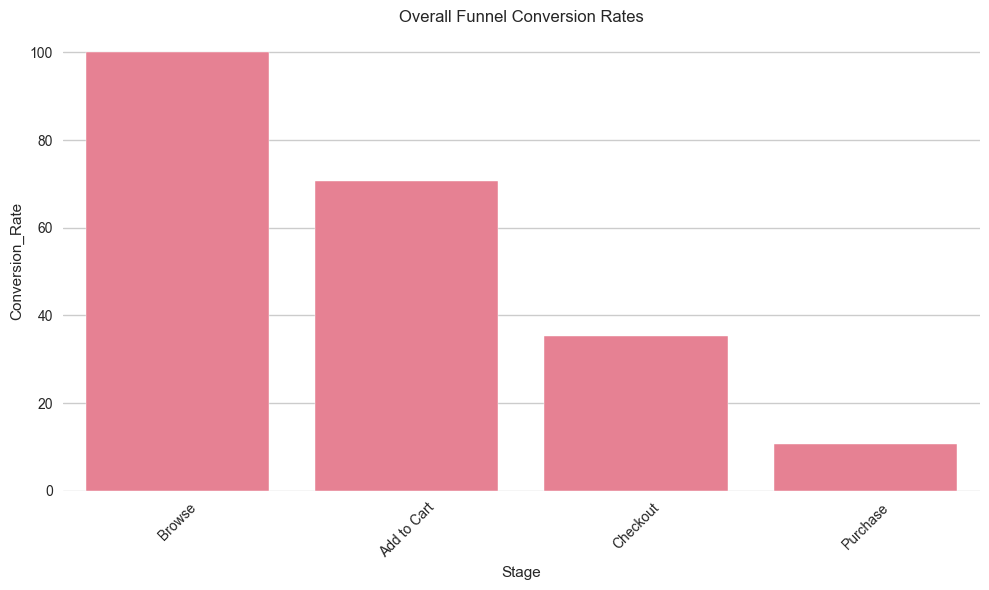

In [51]:
# ================================
# Export Results
# ================================

# Create comprehensive report dictionary
report_data = {
    'Overall_Funnel': funnel_df,
    'Channel_Performance': channel_df,
    'Regional_Analysis': regional_analysis,
    'Device_Performance': device_analysis,
    'Product_Performance': product_analysis,
    'Daily_Trends': daily_metrics,
    'Hourly_Patterns': hourly_sessions
}

# Export to Excel for corporate reporting
with pd.ExcelWriter('funnel_analysis_report.xlsx', engine='xlsxwriter') as writer:
    for sheet_name, data in report_data.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

print("✅ Analysis complete! Report exported to 'funnel_analysis_report.xlsx'")

# ================================
# Save key visualization
# ================================

plt.figure(figsize=(10, 6))
sns.barplot(data=funnel_df, x='Stage', y='Conversion_Rate')
plt.title('Overall Funnel Conversion Rates')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(
    'funnel_conversion_rates.png',
    dpi=300,
    bbox_inches='tight'
)

print("✅ Key visualizations saved!")
